# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [393]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler


In [219]:
# Ignoring warnings 
import warnings
warnings.filterwarnings('ignore')

In [220]:
# Import dataset
data = pd.read_csv('Wholesale_Data.csv')
data_raw = data.copy()
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [221]:
# We don't use Channel and Region for EDA because both are categorical variables
df = data.drop(columns=['Channel', 'Region'])


In [223]:
# Display summary statistics
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [225]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [226]:
# Check missing value
df.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [227]:
# Check 0 values
(df ==0).sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [228]:
# Remove duplicates
df.drop_duplicates(inplace=True)

Data Visualization

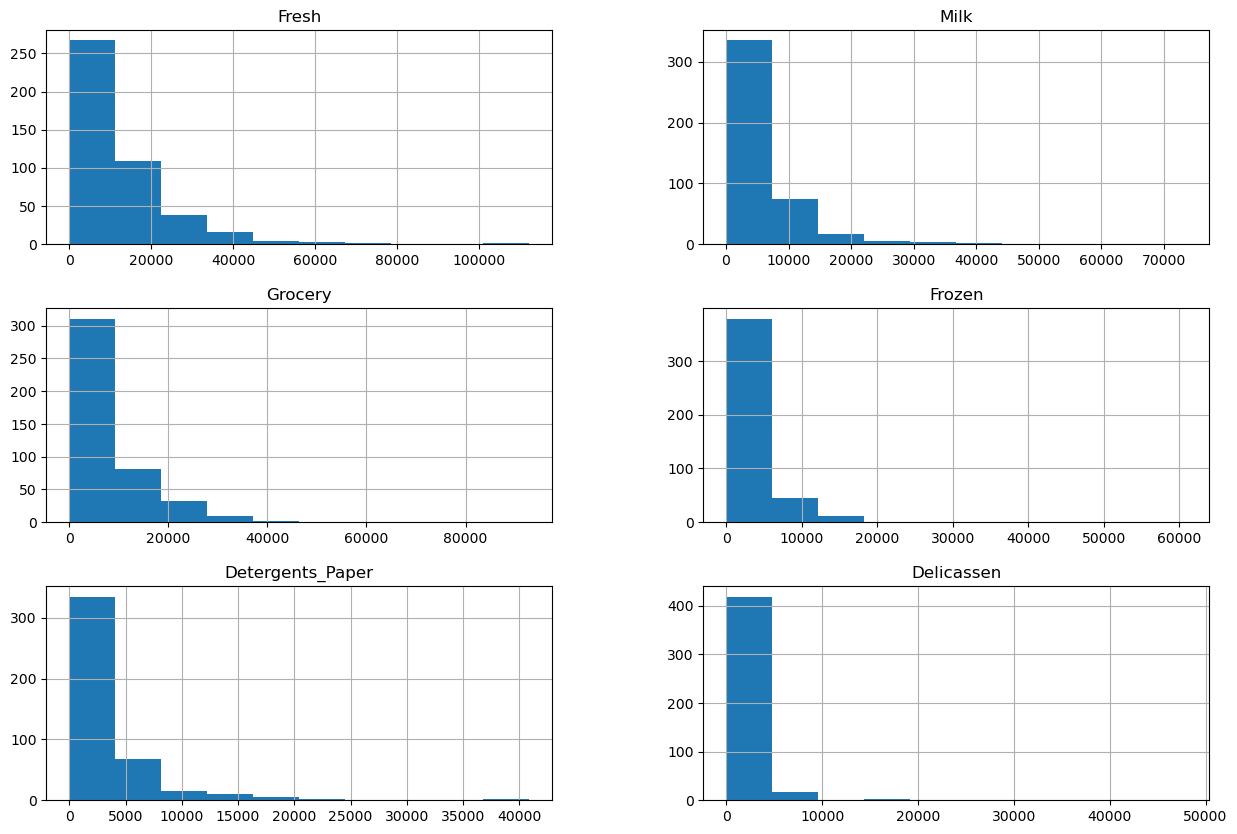

In [229]:
# Histogram
df.hist(figsize=(15, 10))
plt.show()

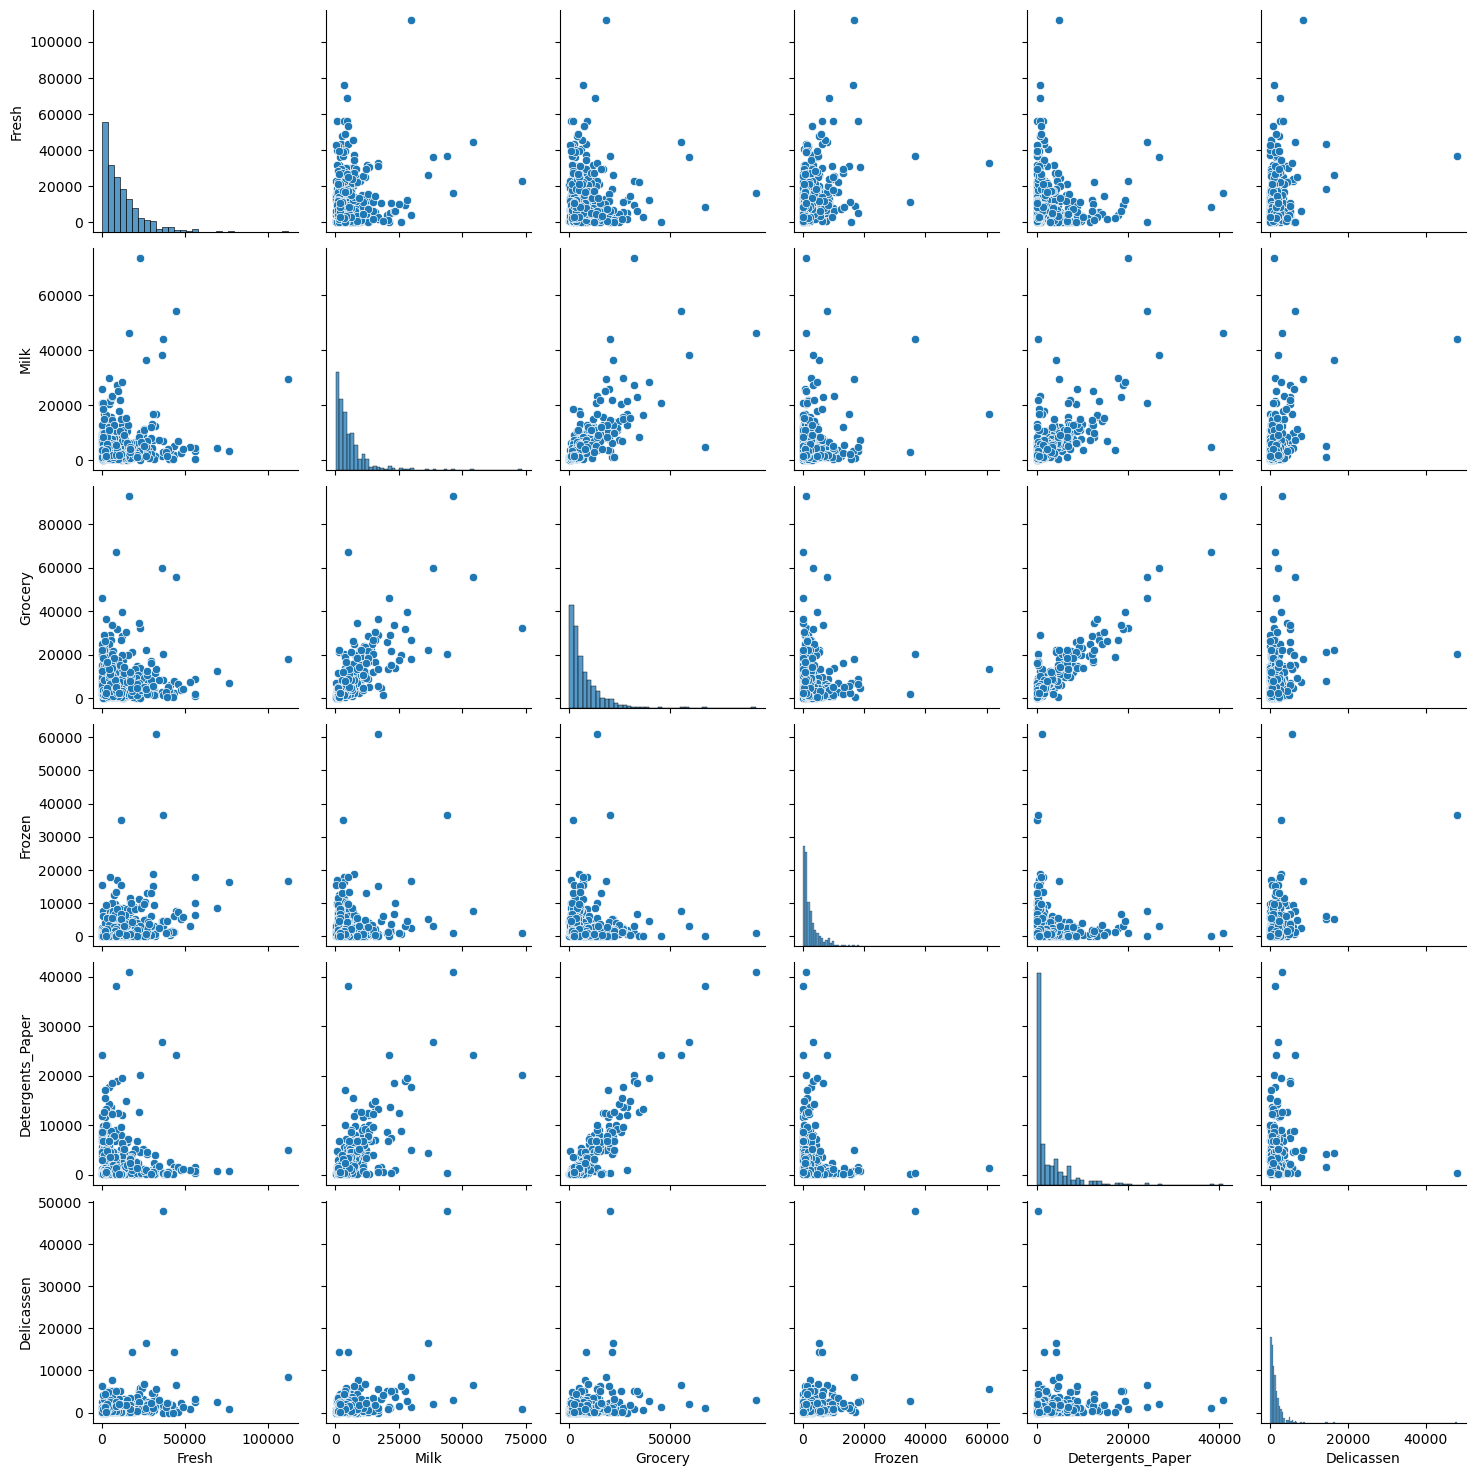

In [230]:
# Use pairplot check visualize pairwise relationships and distributions in a dataset
sns.pairplot(df)
plt.show()

Outlier Detection:

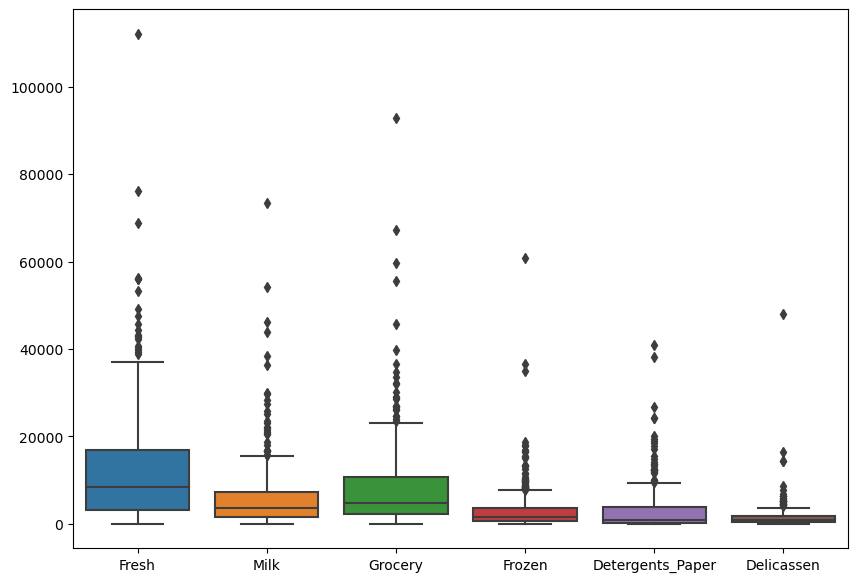

In [231]:
# Using boxplot to visualize outliers
plt.figure(figsize=(10,7))
sns.boxplot(data=df)
plt.show()

In [232]:
# From the Pairplot and boxplot visualization above, remove the outliers
# Remove outlier at Delicassen > 12500
df = df[df['Delicassen'] <= 12500]

# Remove outlier at Detergents_Paper > 35000
df = df[df['Detergents_Paper'] < 35000]

# Remove outlier at Frozen > 30000
df = df[df['Frozen'] < 30000]

# Remove outlier at Grocery > 50000
df = df[df['Grocery'] < 50000]

# Remove outlier at Milk > 45000
df = df[df['Milk'] < 45000]

# Remove outlier at Fresh > 60000
df = df[df['Fresh'] < 60000]

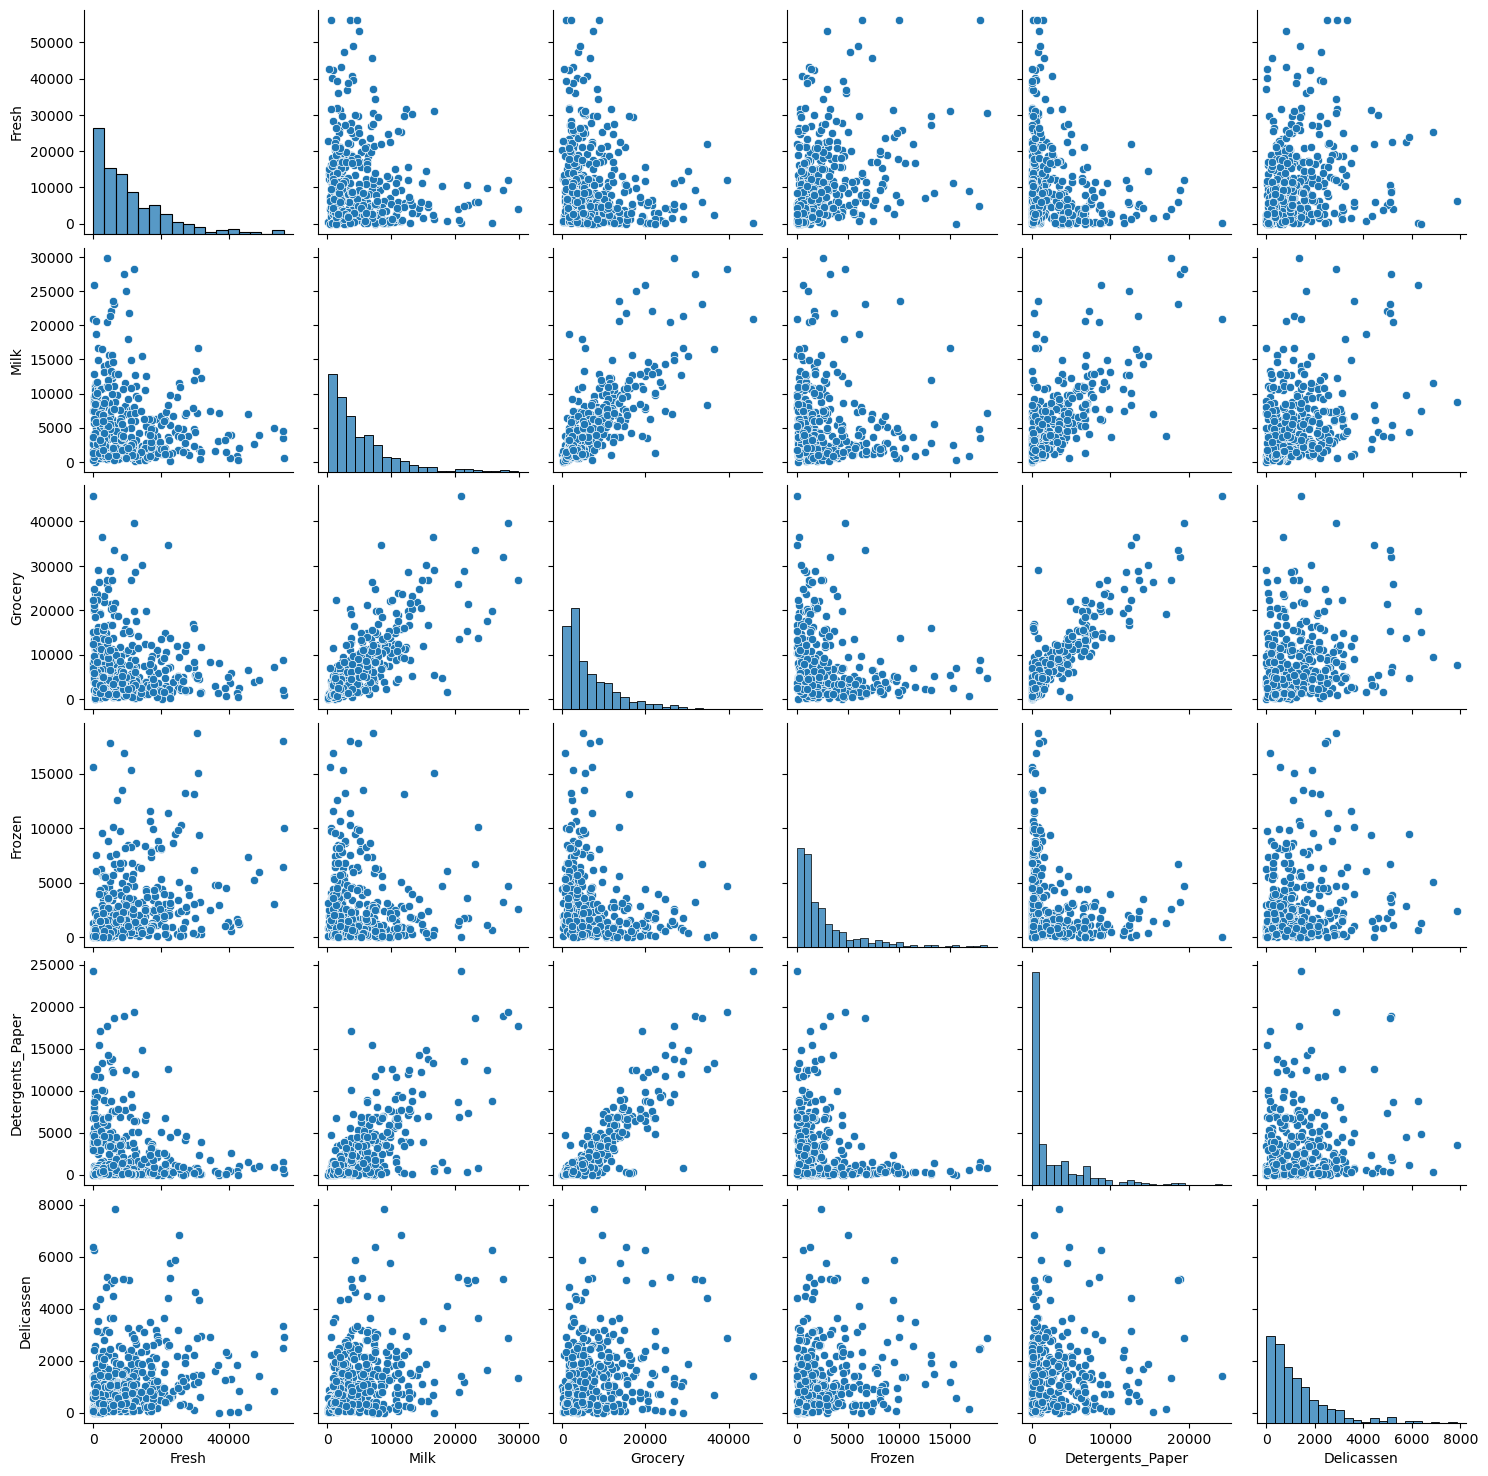

In [233]:
# Check visualize pairwise relationships and distributions in a dataset again
sns.pairplot(df)
plt.show()

Compute and visualize the correlation coefficients

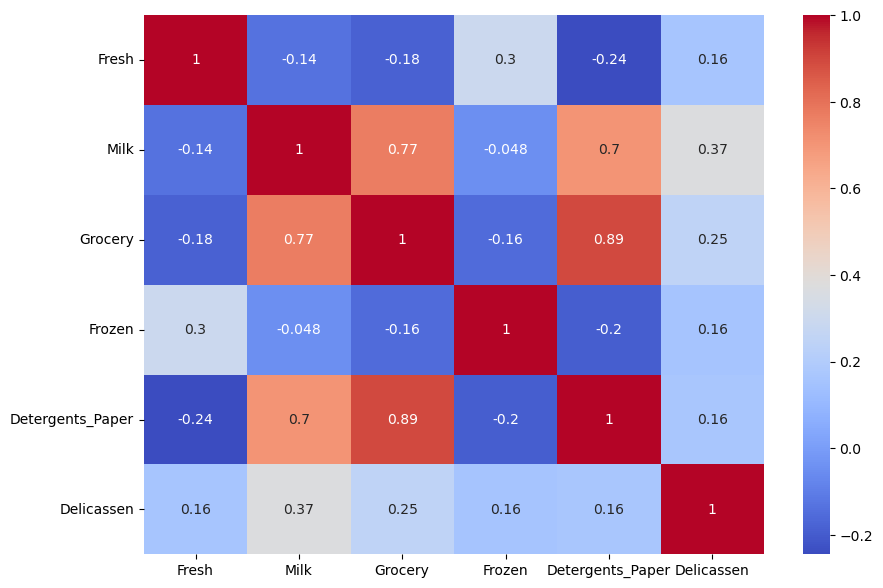

In [234]:
# Correlation analysis
correlation = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

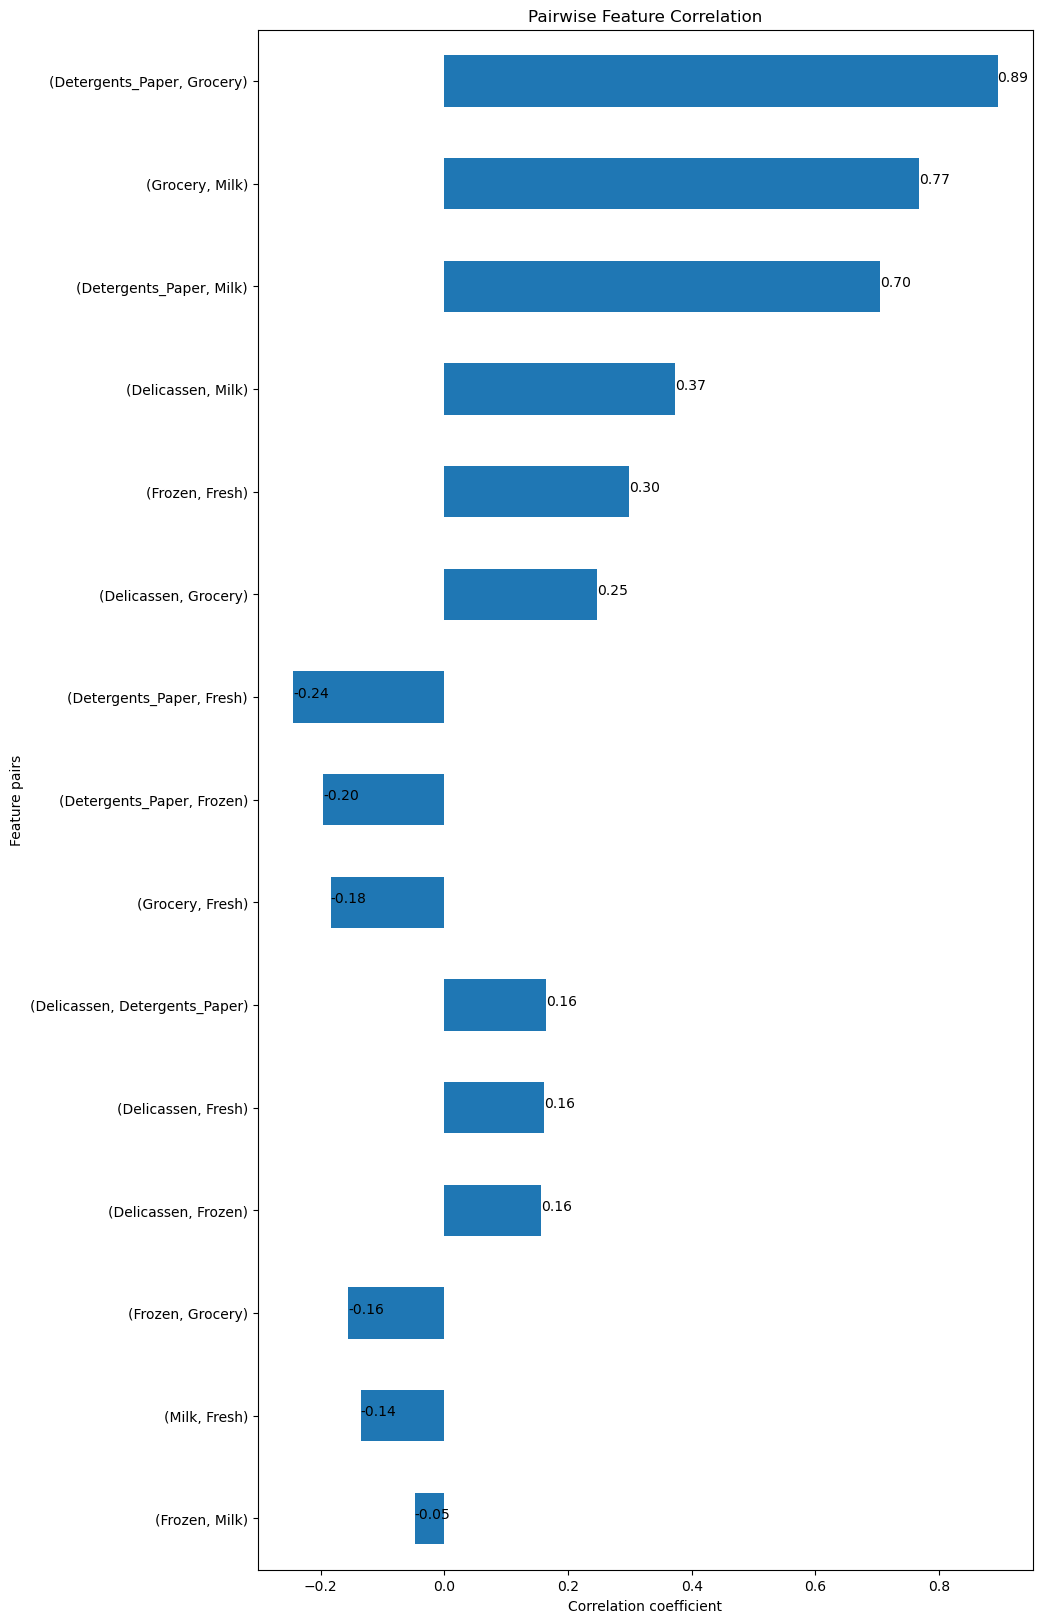

In [235]:
# Visualize the correlation between each pair of features
# Extract upper triangle of the correlation matrix without the diagonal
upper_triangle = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool))

# Flatten to get a series of correlation values
correlations = upper_triangle.stack()

# Sort by absolute value
sorted_correlations = correlations.reorder_levels([1,0]).sort_values(key=lambda x: np.abs(x), ascending=True)

# Plot
plt.figure(figsize=(10, 20))
ax = sorted_correlations.plot(kind='barh')
plt.title('Pairwise Feature Correlation')
plt.xlabel('Correlation coefficient')
plt.ylabel('Feature pairs')

# Annotate each bar with its value
for index, value in enumerate(sorted_correlations):
    ax.text(value, index, f'{value:.2f}')

plt.show()

Data Transformation

In [236]:
# From Histogram plot, there are many of features seem to have a right-skewed distribution. Use: Log Transformation
# Log Transformation
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df[continuous_features] = np.log1p(df[continuous_features])

# Use the RobustScaler to make the data more robust against outliers
scaler = RobustScaler()
df_robust_scaled = scaler.fit_transform(df)


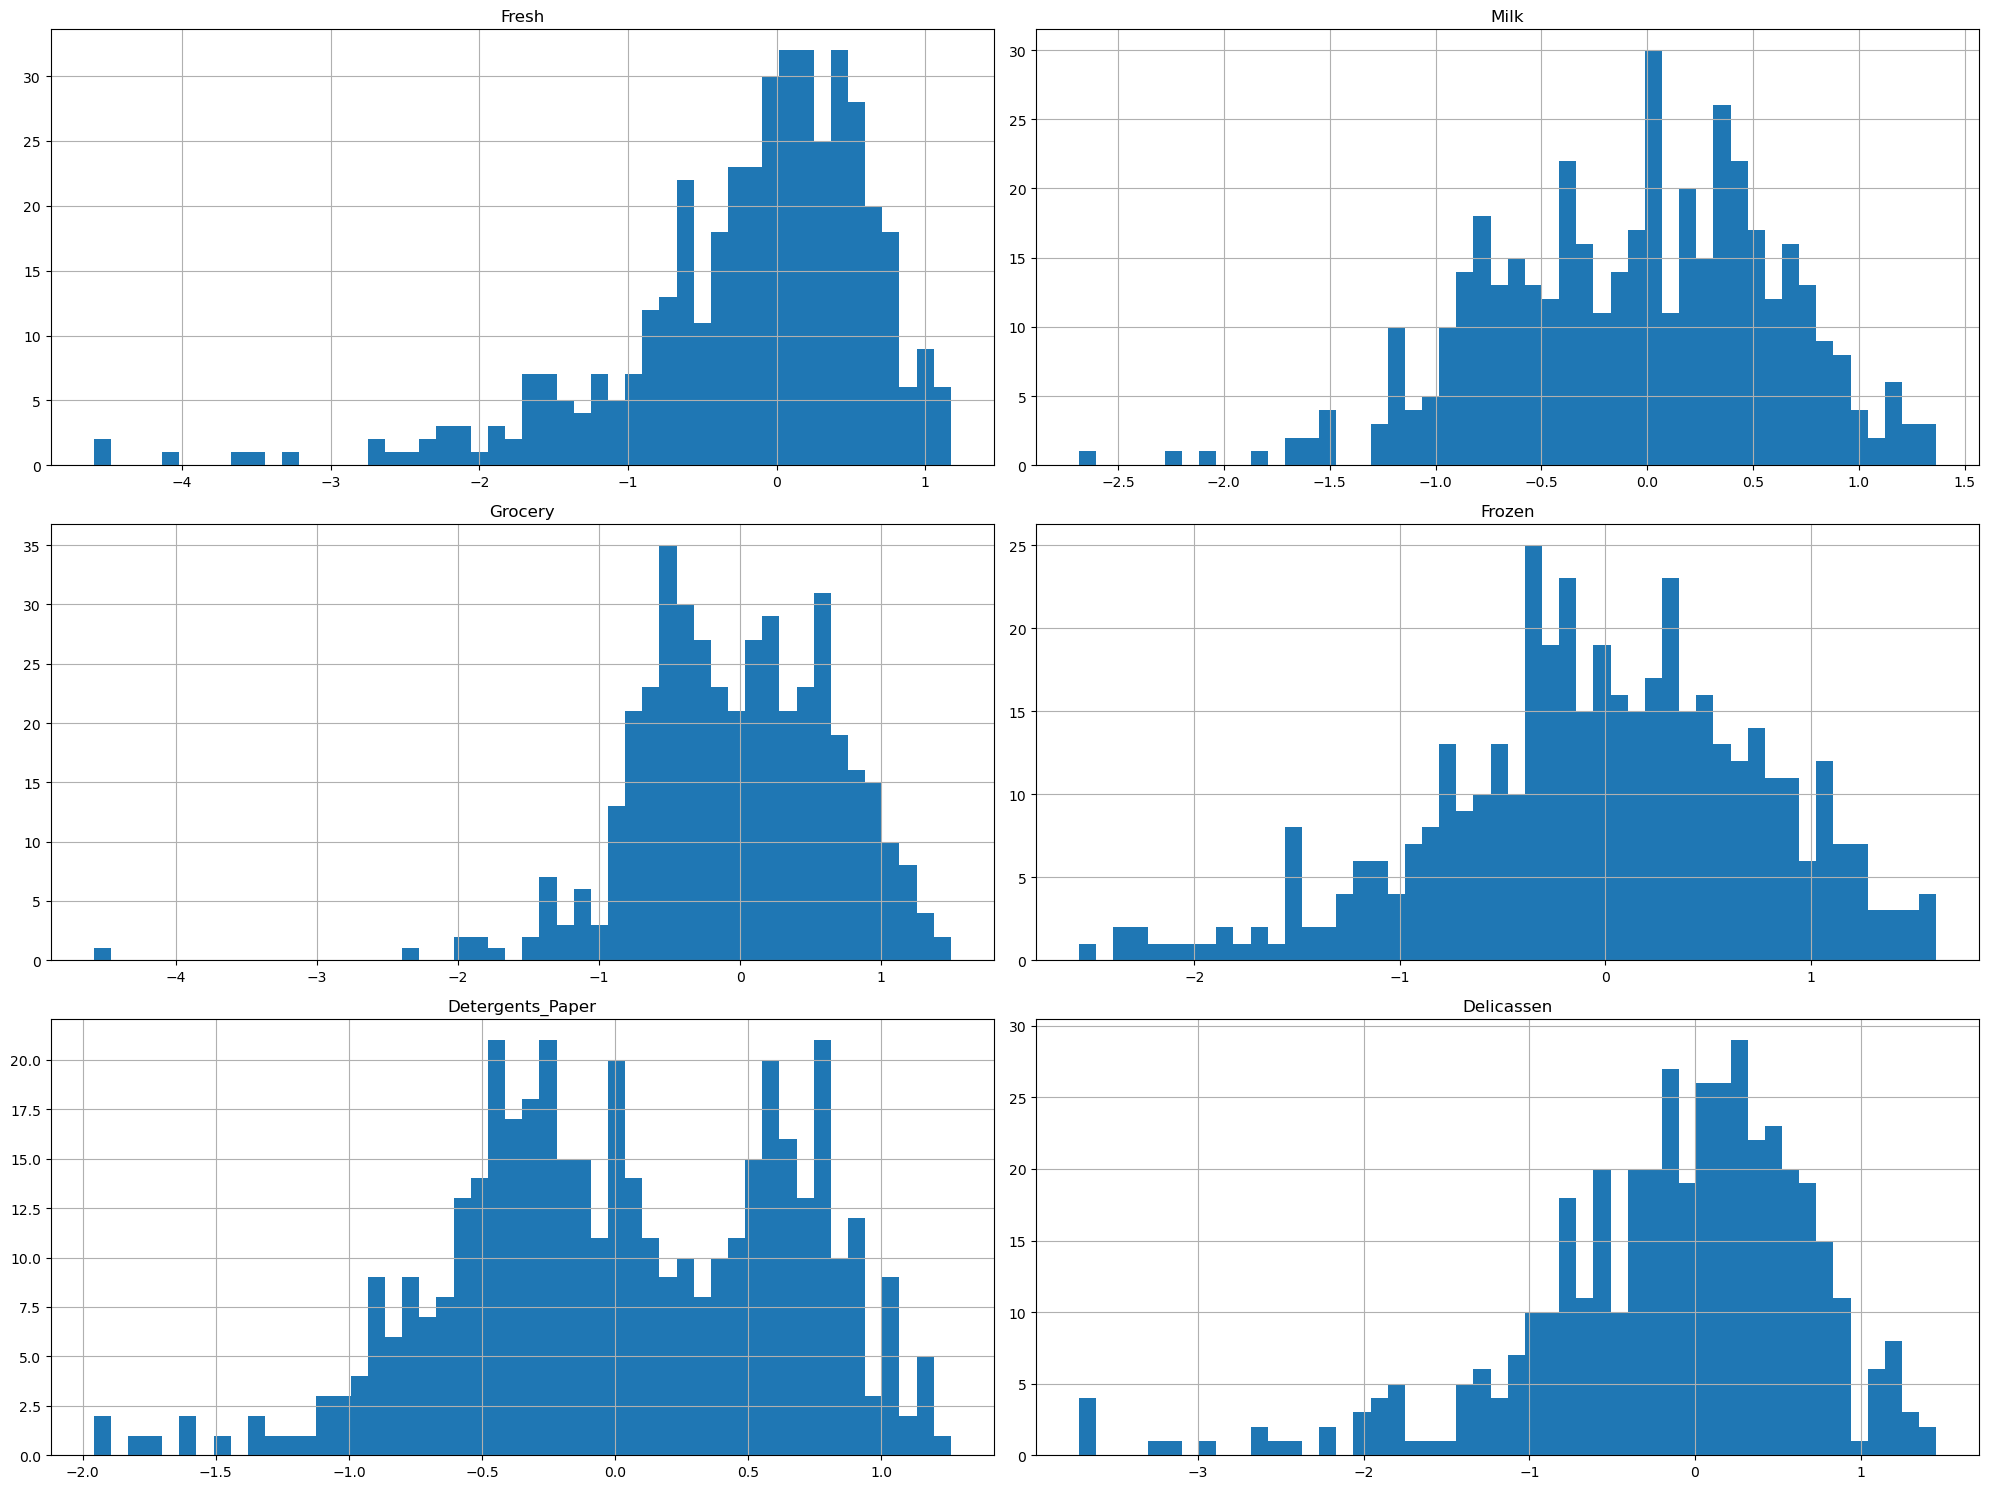

In [237]:
# Plot histograms for all features
df_robust_scaled = pd.DataFrame(df_robust_scaled, columns=df.columns)  # Convert the scaled array back to a DataFrame
df_robust_scaled.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [241]:
df_robust_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.272724,0.636718,0.322690,-1.221586,0.446085,0.250320
1,-0.080619,0.646918,0.475768,0.113152,0.523042,0.443534
2,-0.144078,0.577462,0.333182,0.310399,0.547260,1.457346
3,0.300485,-0.709373,-0.056327,0.931491,-0.168091,0.448129
4,0.622652,0.263263,0.290699,0.619390,0.295072,1.174757


Identify the most important features by PCA

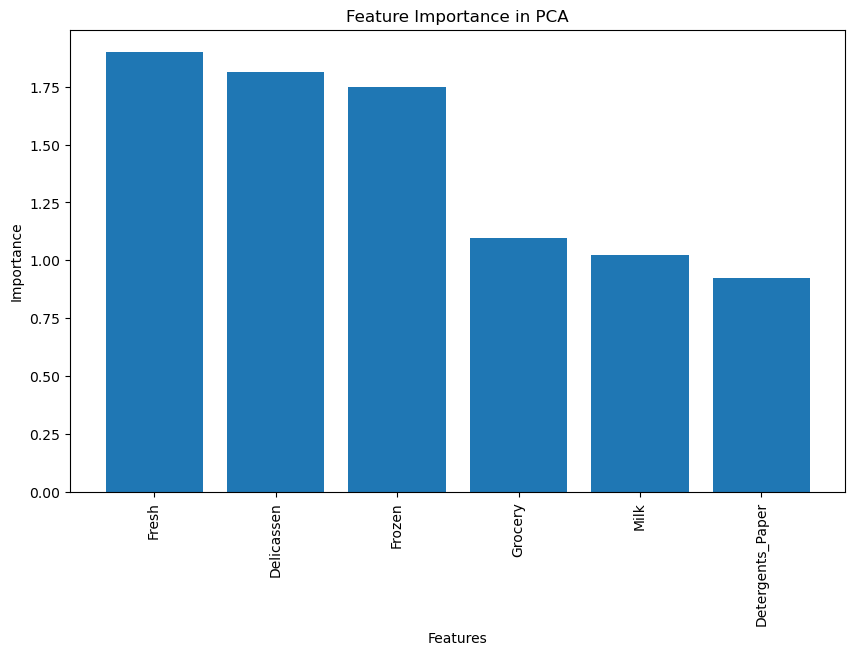

In [392]:
# Retrieve Component Loadings
component_loadings = pca.components_

#Determine Feature Importance
feature_importance = np.abs(component_loadings).sum(axis=0)

#Rank Features
feature_ranking = np.argsort(feature_importance)[::-1]

#Visualize Feature Importance:
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[feature_ranking])
plt.xticks(range(len(feature_importance)), df.columns[feature_ranking], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in PCA')
plt.show()

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

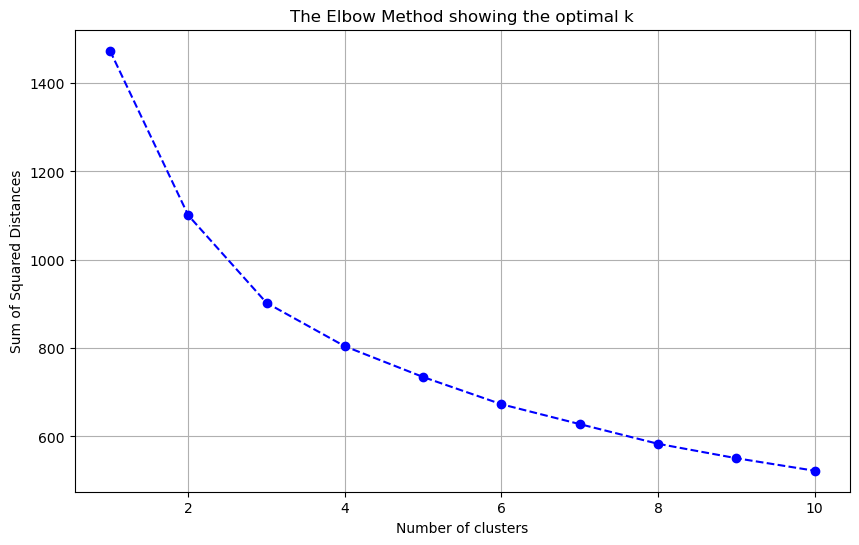

In [275]:
# Compute sum of squared distances for different k
ssd = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_robust_scaled)
    ssd.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10,6))
plt.plot(range(1,11), ssd, 'bo-', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('The Elbow Method showing the optimal k')
plt.grid(True)
plt.show()

In [352]:
# Based on the Elbow Method graph above, the optimal value of k (number of clusters) appears to be around 4
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
y_km = kmeans.fit_predict(df_robust_scaled)

In [348]:
# Print the count of data points in each cluster
unique, counts = np.unique(y_km, return_counts=True)
print(dict(zip(unique, counts)))
print(kmeans.cluster_centers_)

{0: 194, 1: 163, 2: 69}
[[ 0.05728917 -0.59899962 -0.5809723   0.17494433 -0.43709448 -0.35171288]
 [ 0.04879903  0.41599741  0.41935523  0.12428796  0.38061186  0.37670708]
 [-1.45362094  0.25388894  0.476997   -0.94205672  0.47119781 -0.8282415 ]]


In [353]:
# Analyzing the Clusters
df['Cluster'] = y_km
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

            Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
Cluster                                                                      
0        9.580435  7.972208  8.100380  8.372790          6.098695    7.341878
1        8.831034  7.141984  7.465384  7.214689          5.430060    5.974879
2        6.294148  8.476112  9.139516  5.928749          7.814862    5.235643
3        8.744715  9.010254  9.339547  6.906461          8.283937    7.261543


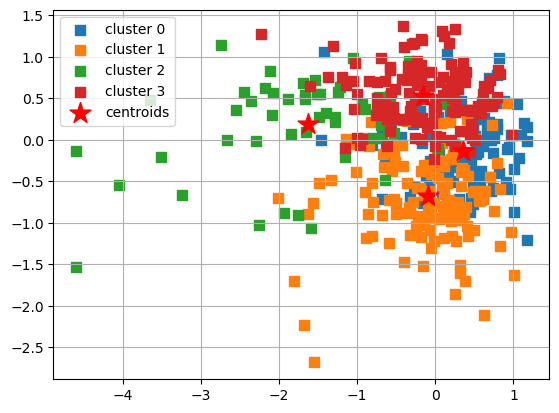

In [354]:
# Plot clustering result
def plot_clusters(X, y_res, plt_cluster_centers=False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

plot_clusters(df_robust_scaled, y_km, plt_cluster_centers=True)

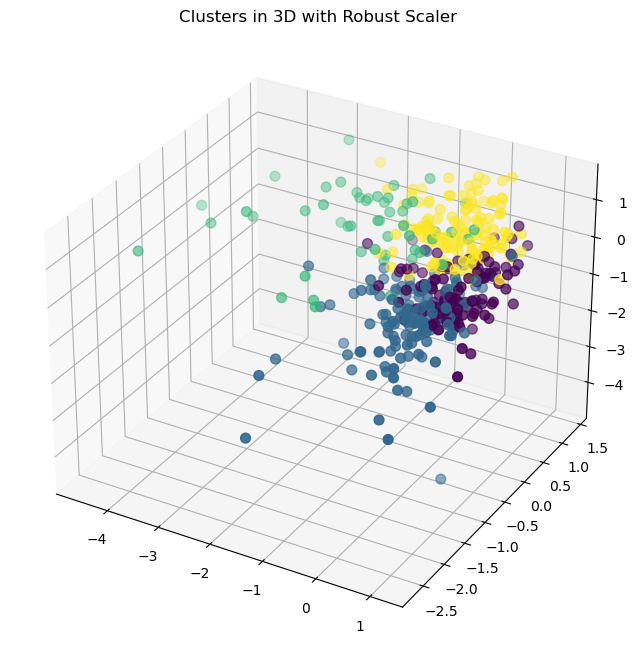

In [355]:
# Plotting (Using the 3D plot as example)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_robust_scaled[:, 0], df_robust_scaled[:, 1], df_robust_scaled[:, 2], c=y_km, s=50, cmap='viridis')
ax.set_title("Clusters in 3D with Robust Scaler")
plt.show()


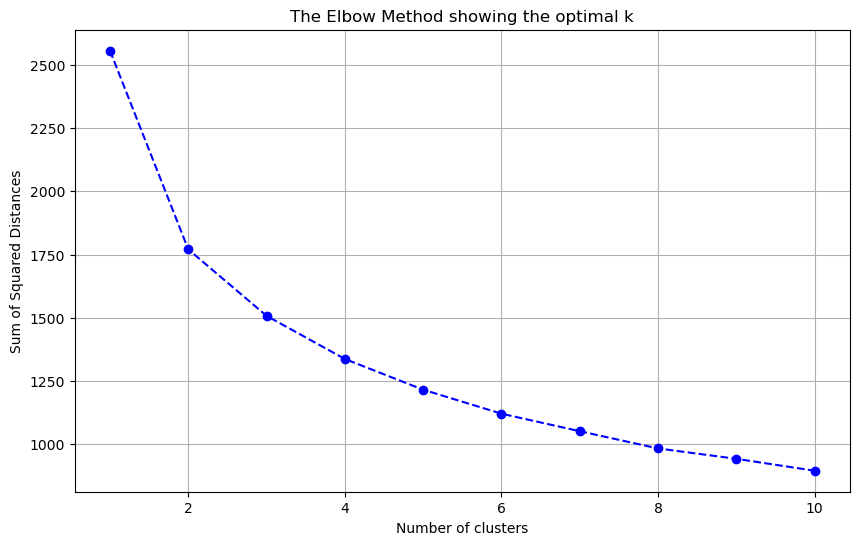

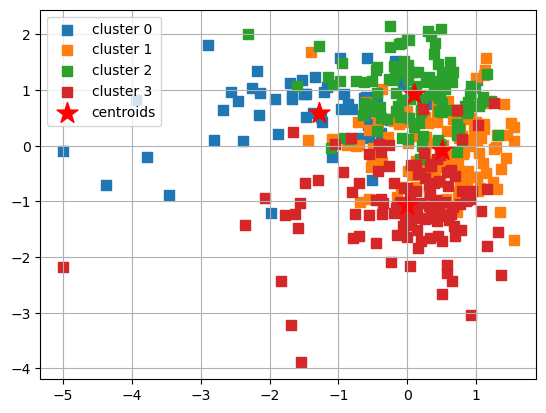

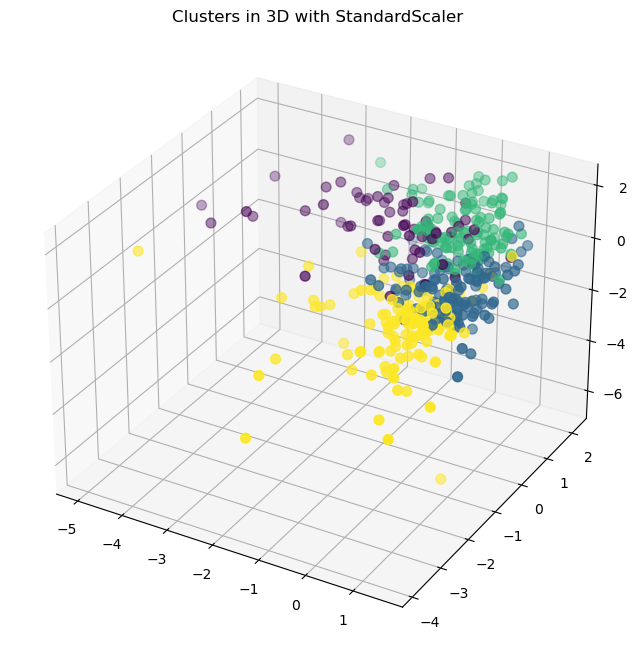

In [398]:
# The clusters are somewhat overlapping, change the scaling to use StandardScaler without Log Transformation
continuous_features1 = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Standard Scaling
scaler = StandardScaler()
df_standard_scaled1 = scaler.fit_transform(df[continuous_features1])

# Compute sum of squared distances for different k
ssd = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_standard_scaled1)
    ssd.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10,6))
plt.plot(range(1,11), ssd, 'bo-', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('The Elbow Method showing the optimal k')
plt.grid(True)
plt.show()

# PCA
pca = PCA(n_components=None)  # Use all components
dfx_pca_standard = pca.fit_transform(df_standard_scaled1)

# Determine optimal number of clusters 
optimal_clusters = 4 

# KMeans Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
y_km_standard1 = kmeans.fit_predict(dfx_pca_standard)

# Plot clustering result
def plot_clusters(X, y_res, plt_cluster_centers=False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

plot_clusters(df_standard_scaled1, y_km_standard1, plt_cluster_centers=True)

# Plotting (Using the 3D plot as example)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_standard_scaled1[:, 0], df_standard_scaled1[:, 1], df_standard_scaled1[:, 2], c=y_km_standard1, s=50, cmap='viridis')
ax.set_title("Clusters in 3D with StandardScaler")
plt.show()

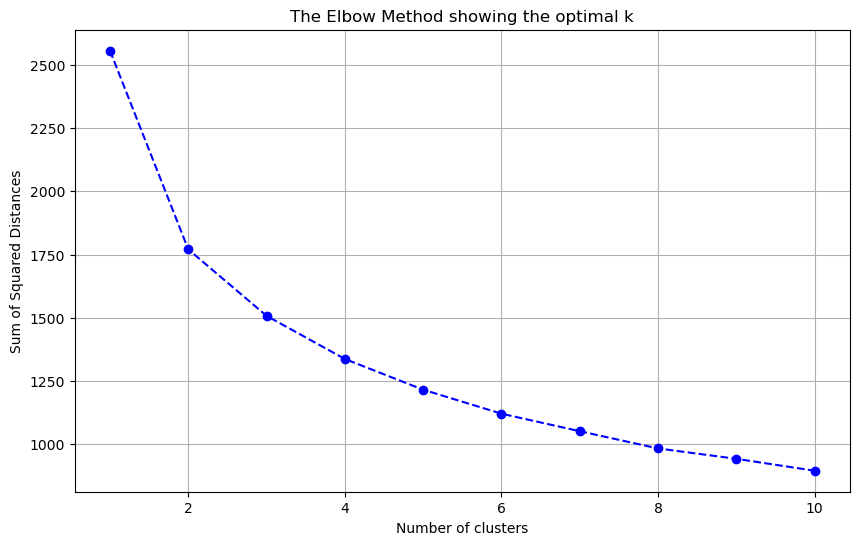

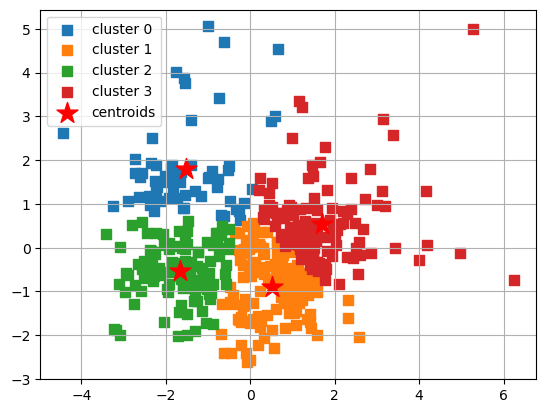

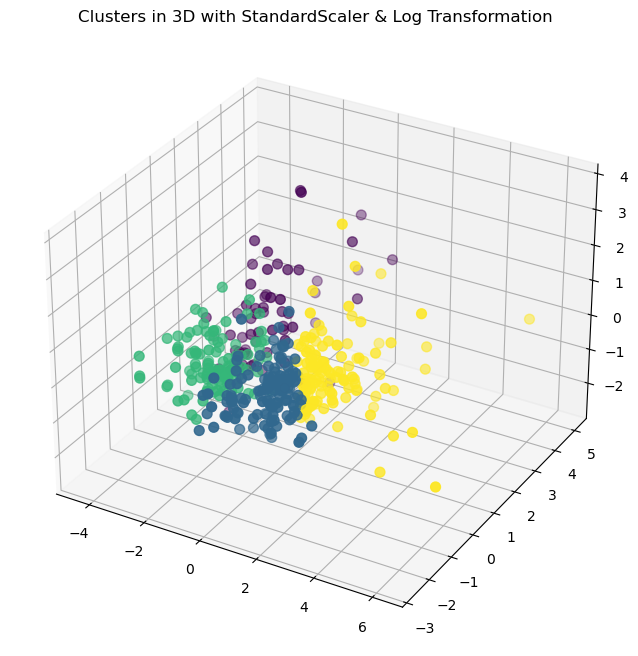

In [401]:
# The clusters are somewhat overlapping, change the scaling to use StandardScaler with Log Transformation

# Standard Scaling
scaler = StandardScaler()
df_standard_scaled = scaler.fit_transform(df[continuous_features])

# Compute sum of squared distances for different k
ssd = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_standard_scaled)
    ssd.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10,6))
plt.plot(range(1,11), ssd, 'bo-', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('The Elbow Method showing the optimal k')
plt.grid(True)
plt.show()

# PCA
pca = PCA(n_components=None)  # Use all components
dfx_pca_standard = pca.fit_transform(df_standard_scaled)

# Determine optimal number of clusters 
optimal_clusters = 4  

# KMeans Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
y_km_standard = kmeans.fit_predict(dfx_pca_standard)

# Plot clustering result
def plot_clusters(X, y_res, plt_cluster_centers=False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

plot_clusters(dfx_pca_standard, y_km_standard, plt_cluster_centers=True)

# Plotting (Using the 3D plot as example)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfx_pca_standard[:, 0], dfx_pca_standard[:, 1], dfx_pca_standard[:, 2], c=y_km_standard, s=50, cmap='viridis')
ax.set_title("Clusters in 3D with StandardScaler & Log Transformation ")
plt.show()


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

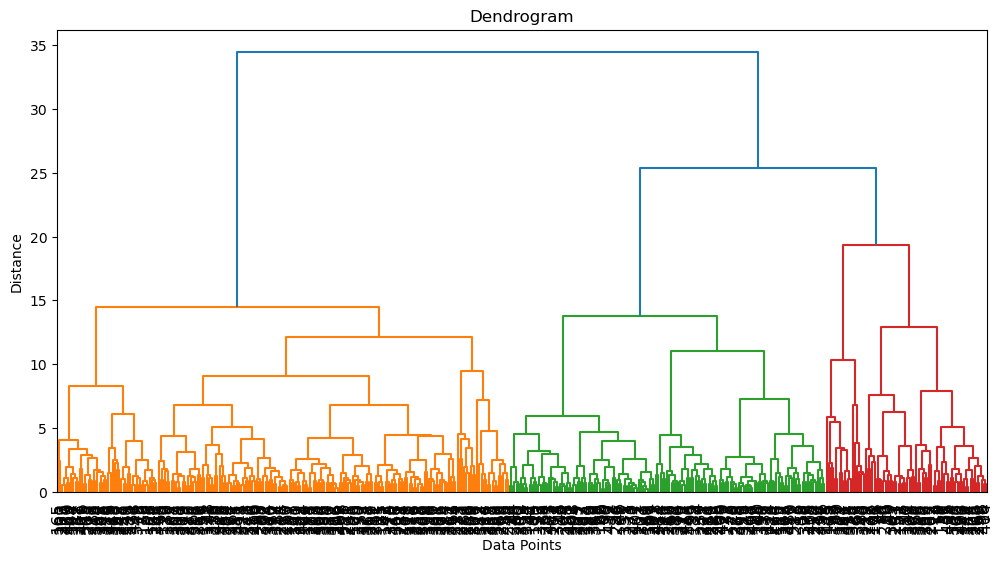

In [377]:
# Calculate the linkage matrix
linkage_matrix = linkage(dfx_pca_standard, method='ward')

# Plot the dendrogram to determine the optimal number of clusters:
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=12.)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [380]:
# Determine the optimal number of clusters is 4
num_clusters = 4

# Cut the dendrogram to get the cluster assignments
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

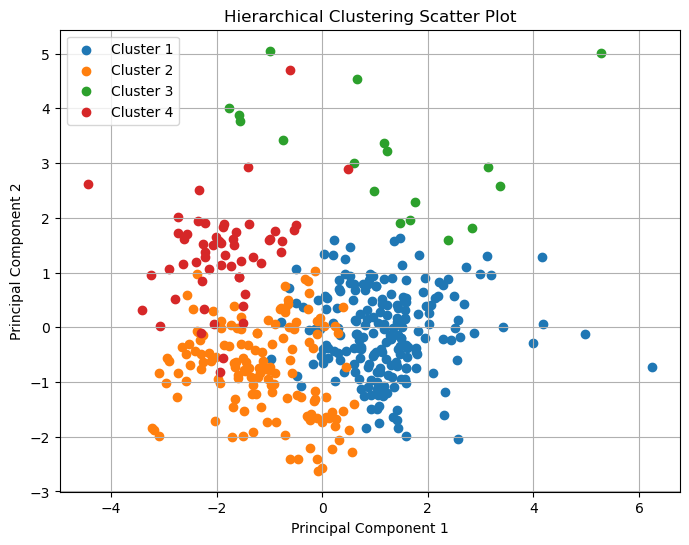

In [381]:
# Create a scatter plot with points colored by cluster labels
plt.figure(figsize=(8, 6))
for cluster_label in np.unique(cluster_labels):
    plt.scatter(
        dfx_pca_standard[cluster_labels == cluster_label, 0],
        dfx_pca_standard[cluster_labels == cluster_label, 1],
        label=f'Cluster {cluster_label}')

plt.title('Hierarchical Clustering Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

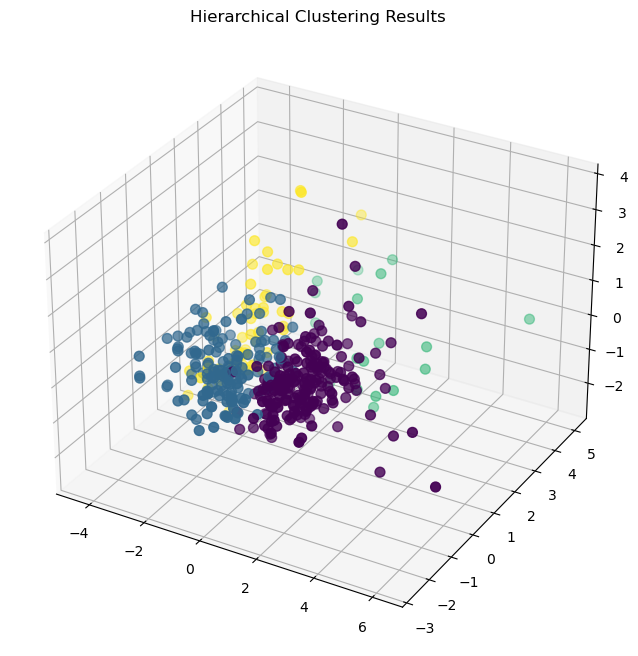

In [366]:
# Assuming dfx_pca_standard has 3 principal components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfx_pca_standard[:, 0], dfx_pca_standard[:, 1], dfx_pca_standard[:, 2], c=cluster_labels, s=50, cmap='viridis')
ax.set_title("Hierarchical Clustering Results")
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

Plot the explained variance ratio

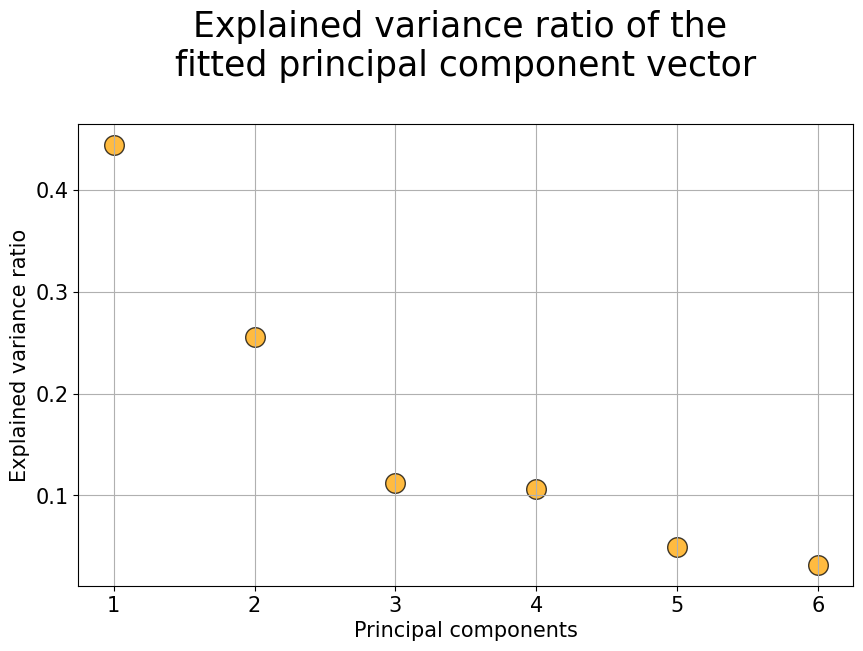

In [394]:
pca = PCA(n_components=None)

dfx_pca = pca.fit(dfx_pca_standard)
dfx_pca

plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [395]:
pca.explained_variance_ratio_

array([0.44445998, 0.25597022, 0.11180659, 0.10634184, 0.04954732,
       0.03187405])

In [406]:
# Displaying loadings for each principal component
components_df = pd.DataFrame(data=pca.components_,
                             index=[f'PC{i+1}' for i in range(len(dfx_pca.explained_variance_ratio_))])
print(components_df)

            0         1         2         3         4         5
PC1  0.173684 -0.532116 -0.565466  0.195311 -0.547850 -0.169260
PC2 -0.574033 -0.178050 -0.035136 -0.560393  0.003158 -0.568770
PC3  0.436205  0.099930  0.171225  0.313460  0.220236 -0.789722
PC4 -0.668211  0.007729  0.039976  0.740144  0.021674 -0.059617
PC5 -0.050004  0.754587 -0.085215 -0.041462 -0.631370 -0.143143
PC6 -0.032236  0.325121 -0.800522 -0.004945  0.502244 -0.012129


For example, in PC1:

Feature 0 (the first feature) has a loading of 0.173684.
Feature 1 has a loading of -0.532116.
Feature 2 has a loading of -0.565466.
Feature 3 has a loading of 0.195311.
Feature 4 has a loading of -0.547850.
Feature 5 has a loading of -0.169260.
These values show how much each feature contributes to PC1. Positive values indicate a positive relationship, and negative values indicate a negative relationship. The magnitude of the values indicates the strength of the relationship.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. EDA: 
    - The data does not follow a normal distribution.
    - Some features exhibit high correlation:
        - Detergents_Paper & Grocery: 0.89
        - Grocery & Milk: 0.77
        - Detergents_Paper & Milk: 0.70
    - Some features have low correlation:
        - Frozen & Grocery: -0.16
        - Milk & Fresh: -0.14
        - Frozen & Milk: -0.05    
    - Features with the highest importance specific to Principal Component Analysis (PCA) are: Fresh, Delicassen, Frozen.
2. KMeans Clustering:
    - The data can be effectively separated into 4 clusters.
    - Using log transformation and standard scaling improves clustering results with this data. 
3. Hierarchical Clustering :
    - The data can also be separated into 4 clusters effectively using hierarchical clustering. 
4. PCA:
    - PC1 captures 44.4% of the variance in the data
    - PC2 captures 25.6%
    - PC3 captures 11.1%
    - PC4 captures 10.6%
    - PC5 captures 4.9%
    - PC6 captures the remaining 3.1%.
